##初始化

In [60]:
import json
from gensim.models import Word2Vec
import jieba
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re
import random
from tqdm import tqdm
import time
import os

读取baike_qa_train.json文件到data[]里

In [ ]:
def read_json(path_way, character):
    data = []
    with open(path_way, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            if line != '':
                sample = json.loads(line)
                data.append(sample.copy())
    train_data = [i[character] for i in data[:]]
    return train_data

In [85]:
def display(data:list):
    print('len:', len(data))
    for i in range(5):
        print(data[i])

In [5]:
print(len(train_data))

1425170


预训练+数据分块处理+随机采样数据+词频过滤

In [71]:

class model_train():
    def __init__(self, model_name, data, args, model_path):#设置参数，数据，模型信息
        
        self.paras = args
        
        self.data = data
        
        self.model_path = model_path
        
        def select_model(model_name):
            if model_name.lower() == 'word2vec':
                return Word2Vec
            elif model_name.lower() == 'fasttext':
                return FastText
            else:
                return None
        
        self.model = select_model( model_name )
        
    def cut_words(self,train_data):
        seg_data = list()
        for i in train_data:
            new_text = "".join(re.findall('[\u4e00-\u9fa5]+', i, re.S))# 去除一些无用的字符只提取出中文出来
            seg_i = jieba.lcut(new_text)
            seg_data.append(seg_i)
        return seg_data
    
    def pre_train_model(self):#预训练一个模型
        seg_data = self.cut_words(self.data[:1000])
        Model = self.model(sentences=seg_data, **self.paras)
        Model.save( self.model_path )
    
    def random_samples_trainmodel(self, sample_size, epoches):#随机采样进行模型训练
        if not os.path.exists( self.model_path):
            self.pre_train_model()
        Model =self.model.load(self.model_path)#导入预训练model
        with tqdm(total=epoches, desc="Training", unit="step") as pbar:
            for _ in range(epoches):
                random_samples = random.sample(self.data, sample_size)
                seg_data = self.cut_words( random_samples )
                Model.train(seg_data, total_examples=len(seg_data), epochs=1)
                # 更新进度条
                pbar.update(1)
            Model.save(self.model_path )
    
    def epoches_samples_trainmodel(self, delt_data, size):#数据分批进行模型训练
        if not os.path.exists( self.model_path):
            self.pre_train_model()
        Model =self.model.load(self.model_path)
        with tqdm(total=size, desc="Training", unit="step") as pbar:
            for t in range(1,size+1):
                cut_data = self.data[delt_data*(t-1):delt_data*t]
                seg_data = self.cut_words( cut_data )
                Model.train(seg_data, total_examples=len(seg_data), epochs=1)
                 # 更新进度条
                pbar.update(1)
            Model.save(self.model_path )
        

In [74]:
paras = {'vector_size':100, 'window':5, 'min_count':1, 'workers':8, 'sg':1}
Model = model_train(model_name="word2vec", data=train_data, args=paras, model_path="word2vec.model")
Model.pre_train_model()

In [24]:
paras = {'vector_size':100, 'window':5, 'min_count':1, 'workers':8, 'sg':1}
Model = model_train(train_data, paras, model_path = "random_word2vec.model")
Model.random_samples_trainmodel(10000,142)

Training: 100%|█████████████████████████████████████████████████████████████████████| 142/142 [12:56<00:00,  5.47s/step]


In [17]:
paras = {'vector_size':100, 'window':5, 'min_count':1, 'workers':8, 'sg':1}
Model = model_train(train_data, paras, model_path = "epoches_word2vec.model")
Model.epoches_samples_trainmodel(14251, 100)

Training: 100%|█████████████████████████████████████████████████████████████████████| 100/100 [12:47<00:00,  7.67s/step]


以下验证模型优劣：

In [75]:
from gensim.models import Word2Vec
# model = Word2Vec.load("random_word2vec.model")
# model = Word2Vec.load("epoches_word2vec.model")
model = Word2Vec.load("word2vec.model")

In [76]:
model.wv.key_to_index # 获得所有词汇组

{'的': 0,
 '是': 1,
 '在': 2,
 '了': 3,
 '你': 4,
 '有': 5,
 '和': 6,
 '可以': 7,
 '就': 8,
 '也': 9,
 '我': 10,
 '不': 11,
 '都': 12,
 '会': 13,
 '如果': 14,
 '要': 15,
 '一个': 16,
 '上': 17,
 '对': 18,
 '为': 19,
 '中': 20,
 '好': 21,
 '等': 22,
 '很': 23,
 '到': 24,
 '人': 25,
 '用': 26,
 '或': 27,
 '他': 28,
 '没有': 29,
 '自己': 30,
 '后': 31,
 '就是': 32,
 '把': 33,
 '这': 34,
 '与': 35,
 '将': 36,
 '而': 37,
 '说': 38,
 '多': 39,
 '去': 40,
 '可': 41,
 '能': 42,
 '所以': 43,
 '还': 44,
 '但': 45,
 '时': 46,
 '可能': 47,
 '做': 48,
 '治疗': 49,
 '这个': 50,
 '再': 51,
 '问题': 52,
 '给': 53,
 '需要': 54,
 '个': 55,
 '吃': 56,
 '什么': 57,
 '系统': 58,
 '我们': 59,
 '以': 60,
 '因为': 61,
 '时候': 62,
 '下': 63,
 '不是': 64,
 '然后': 65,
 '孩子': 66,
 '选择': 67,
 '使': 68,
 '使用': 69,
 '您': 70,
 '不要': 71,
 '方法': 72,
 '现在': 73,
 '应该': 74,
 '吧': 75,
 '并': 76,
 '皮肤': 77,
 '时间': 78,
 '让': 79,
 '从': 80,
 '一般': 81,
 '来': 82,
 '还是': 83,
 '看': 84,
 '更': 85,
 '啊': 86,
 '被': 87,
 '及': 88,
 '一些': 89,
 '如': 90,
 '的话': 91,
 '它': 92,
 '她': 93,
 '这样': 94,
 '比较': 95,
 '情况': 96,
 '那':

In [77]:
model.wv.vectors.shape # 查看词向量大小

(20095, 100)

In [78]:
model.wv.most_similar('中国',topn=10) # 取出与“中国”最相似的10个词

[('市场', 0.9959376454353333),
 ('企业', 0.9958359599113464),
 ('内', 0.9958242177963257),
 ('管理', 0.9955950379371643),
 ('内容', 0.9948558807373047),
 ('升值', 0.9946826696395874),
 ('基金', 0.9946686029434204),
 ('设计', 0.994575560092926),
 ('发育', 0.9944990873336792),
 ('房地产', 0.9944314360618591)]

In [79]:
model.wv.similarity('中国', '美国') # 计算两个词的余弦相似度

0.99108225

In [80]:
model.wv.most_similar(positive=["男人","国王" ], negative=["女人"], topn=10) # 获得 国王-男人+女人 的词 ，理应为女王

[('粥', 0.9943662285804749),
 ('综合征', 0.9939058423042297),
 ('芝麻', 0.9938662052154541),
 ('便于', 0.9938458204269409),
 ('要素', 0.9938331842422485),
 ('旅游', 0.9937399625778198),
 ('沉着', 0.9936827421188354),
 ('念珠菌', 0.993660032749176),
 ('春秋战国', 0.9935654997825623),
 ('墨西哥', 0.9934926629066467)]

In [81]:
model.wv.closer_than("上海", "中国") # 比 中国 更接近 上海 的词汇

['如',
 '其',
 '功能',
 '内',
 '攻击',
 '作用',
 '采用',
 '之',
 '内容',
 '由',
 '发生',
 '症状',
 '写字楼',
 '分钟',
 '应',
 '市场',
 '对于',
 '企业',
 '米',
 '加入',
 '导致',
 '即可',
 '扬州',
 '成为',
 '魔剑',
 '女性',
 '手术',
 '以及',
 '服务',
 '美国',
 '包括',
 '形成',
 '者',
 '因',
 '已',
 '超过',
 '即',
 '武器',
 '孕妇',
 '疾病',
 '投资',
 '监控',
 '纵隔',
 '放入',
 '大量',
 '水',
 '含有',
 '表示',
 '次',
 '网络',
 '设计',
 '规定',
 '用于',
 '标准',
 '管理',
 '之间',
 '其它',
 '人民币',
 '健康',
 '以下',
 '升值',
 '例如',
 '脂肪',
 '至',
 '处理',
 '现象',
 '发育',
 '维生素',
 '盐',
 '实现',
 '因素',
 '项目',
 '空竹',
 '模式',
 '国际',
 '利用',
 '外',
 '天堂',
 '饮食',
 '血管',
 '之一',
 '土豆',
 '均',
 '胎儿',
 '最大',
 '食品',
 '飞机',
 '改变',
 '搭桥',
 '如下',
 '处',
 '生产',
 '提高',
 '其中',
 '第一',
 '国家',
 '无',
 '颜色',
 '材料',
 '低',
 '两种',
 '房地产',
 '改善',
 '二',
 '球队',
 '显示',
 '向',
 '病变',
 '需求',
 '有关',
 '妇女',
 '阴道',
 '煮',
 '面膜',
 '基金',
 '随着',
 '积分',
 '中心',
 '生长',
 '站',
 '国内',
 '且',
 '平台',
 '天线',
 '全面',
 '距离',
 '专家',
 '水平',
 '各',
 '变得',
 '从而',
 '量',
 '长期',
 '加上',
 '死亡',
 '另',
 '阿达茨',
 '分别',
 '吸收',
 '干',
 '我国',
 '相对',
 '类型',
 '药物',
 '部位',
 '食用',
 '

语义类比测试

In [82]:

# 进行语义类比测试（中文）
analogy_tests = [
    ( "国王","男人", "女王","女人"),
    ("日本", "寿司", "意大利", "披萨"),
    ("中国", "北京", "法国", "巴黎"),
     ("爸爸", "妈妈", "大", "小"),
    ("苹果", "水果", "猫", "动物"),
    ("中国", "北京", "美国", "华盛顿"),
    ("学校", "老师", "医院", "医生"),
    ("电脑", "软件", "手机", "应用"),
    # 添加更多的类比测试
]

correct_count = 0
total_count = len(analogy_tests)

# 遍历类比测试
for analogy_test in analogy_tests:
    word1, word2, word3, expected_word4 = analogy_test

    # 计算类比
    try:
        inferred_vector = model.wv[word2] - model.wv[word1] + model.wv[word3]
        most_similar_words = model.wv.most_similar(inferred_vector, topn=30)
        # 检查预测的词语是否与期望的词语相符
        for i in range(30): 
            if  expected_word4 ==  most_similar_words[i][0]:
                correct_count += 1
                break
    except KeyError:
        # 如果任何一个词语不在词汇表中，则跳过此类比测试
        pass

# 计算准确率
accuracy = correct_count / total_count
print("Accuracy:", accuracy)

Accuracy: 0.125


结果可视化

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# 加载预训练的 Word2Vec 模型
model = Word2Vec.load("word2vec.model")

# 获取模型中所有词语的词向量
words = list(model.wv.key_to_index)
vectors = model.wv[words]

# 使用 t-SNE 将词向量降维至二维
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)
print("vectors_2d finished")

# 将 t-SNE 降维后的结果保存为 numpy 数组
np.save('vectors_2d.npy', vectors_2d)


以上完成向量降维并储存

In [ ]:
# 加载预训练的 Word2Vec 模型
model = Word2Vec.load("word2vec.model")
# 获取模型中所有词语的词向量
words = list(model.wv.key_to_index)

vectors_2d = np.load('vectors_2d.npy')
# print(np.max(vectors_2d),np.min(vectors_2d))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建一个二维可视化图
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:10000, 0], vectors_2d[:10000, 1], marker='o', s=8);
# 给每个点添加对应的词语标签
for i, word in enumerate(words[:10000]):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=20)

# 添加图标题和坐标轴标签
plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


# 显示可视化图
plt.show()

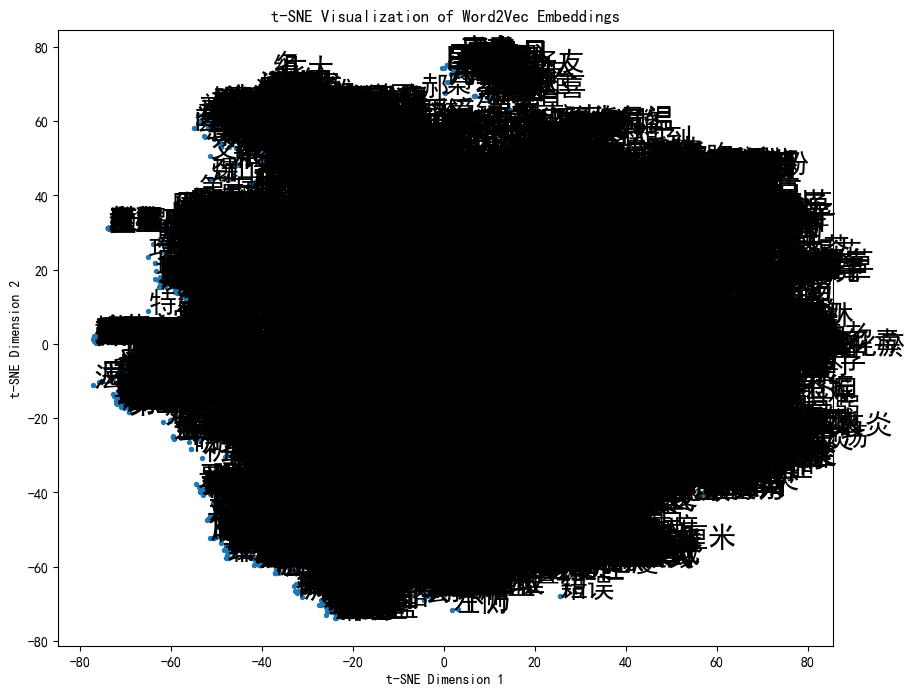

美国与中国的相似词分析

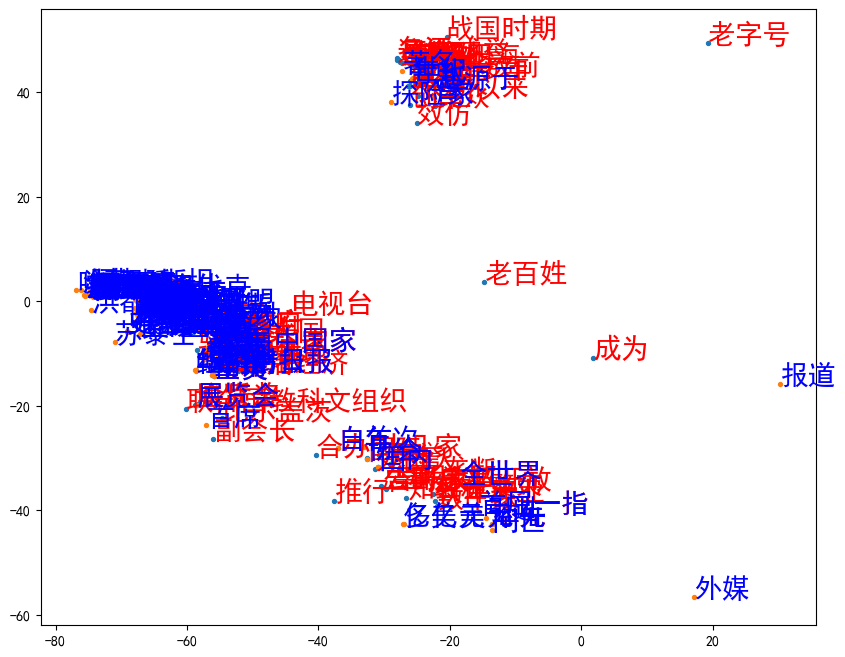

0.67381287

In [116]:
# 加载预训练的 Word2Vec 模型
model = Word2Vec.load("word2vec.model")
# 获取模型中所有词语的词向量
words = list(model.wv.key_to_index)
#获取降维词汇向量
vectors_2d = np.load('vectors_2d.npy')

china = [words.index(word) for word, _ in model.wv.most_similar(positive=['中国'], topn=100)] # 取出与“中国”最相似的100个词
amrica= [words.index(word) for word, _ in model.wv.most_similar(positive=['美国'], topn=100)] # 取出与“美国”最相似的100个词


# 创建一个二维可视化图
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[china, 0], vectors_2d[china, 1], marker='o', s=8);
plt.scatter(vectors_2d[amrica, 0], vectors_2d[amrica, 1], marker='o', s=8);
# 给每个点添加对应的词语标签
for i in china:
    plt.annotate(words[i], xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=20, color='red')
for i in amrica:
    plt.annotate(words[i], xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=20, color='blue')
# 显示可视化图
plt.show()

model.wv.similarity('中国', '美国') # 计算两个词的余弦相似度

如何降低训练代价，提升训练性能？

1，减小数据规模：

如果训练数据量非常大，可以考虑对数据进行采样或者截断，以降低数据量。例如，可以只使用部分语料库进行训练，或者通过简单的随机采样来减少数据量。

2，数据预处理：

在输入数据到模型之前，进行一些预处理操作，如词语的小写化、去除停用词、词干提取或者词语标准化等。这可以减少词汇量，并且提高模型的泛化能力。或者进行分块处理，将语料库分成多个块，每次加载一个块进行训练，这样可以减少内存消耗，并且使得可以处理更大规模的数据

3，调整模型参数：

通过调整词向量的维度、上下文窗口大小、负采样的数量等参数，可以探索不同的模型设置，从而提高性能。

4，使用更高效的实现：

可以尝试使用更高效的实现来加速训练过程。例如，使用 Gensim 中的多线程实现或者 Cython 加速版本。这些实现通常比基本的 Python 实现更快速。或者来块黄老板的AI芯片，可惜钱袋空空。

5，使用更小的词向量维度：

减少词向量的维度可以减少模型的复杂度，从而降低训练代价。虽然较小的词向量维度可能会损失一些信息，但对于大规模语料库来说，这种损失可能是可以接受的。

6，迭代训练：

在大规模语料库上进行单次完整的训练可能是昂贵的。相反，可以选择使用迭代训练的方式，即多次遍历数据集进行训练，每次只使用部分数据。这样可以减少单次训练的数据量，降低训练代价。

7，使用预训练模型：

如果应用场景允许，可以考虑使用预训练的 Word2Vec 模型，而不是从头开始训练。这样可以节省训练时间，并且通常能够获得更好的词向量表示，尤其是在资源有限的情况下。

In [ ]:
预训练模型:
    import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))
['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']
>>>
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')
>>>
# Use the downloaded vectors as usual:
glove_vectors.most_similar('twitter')
[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

CBOW (Continuous Bag of Words)

CBOW 模型的工作原理是基于上下文中的词语来预测目标词汇。具体来说，它假设在给定上下文词语的情况下，预测目标词汇。CBOW 模型的架构包含一个隐藏层，其维度通常是词向量维度的一半，用于学习词语之间的语义关系。CBOW 模型通过最大化预测目标词汇的概率来训练模型参数。



优势：
训练速度快：由于 CBOW 模型的目标是根据上下文预测目标词汇，因此它通常比 skip-gram 模型训练速度更快。
对稀有词的处理：CBOW 模型对稀有词的处理较为有效，因为它在训练过程中将上下文的信息汇总到一个目标词汇上，从而减轻了稀有词的影响。


劣势：
语义信息损失：由于 CBOW 模型将上下文信息汇总到一个目标词汇上，因此它可能会丢失一些词语之间的语义关系。
不适合长文本：CBOW 模型在处理长文本时可能效果不佳，因为它没有考虑到词语的顺序。


Skip-gram

Skip-gram 模型的工作原理与 CBOW 相反，它的目标是根据目标词汇来预测上下文。具体来说，给定一个目标词汇，skip-gram 模型试图预测它的上下文词语。Skip-gram 模型同样包含一个隐藏层，用于学习词语之间的语义关系。

优势：
考虑词序信息：Skip-gram 模型考虑了词语的顺序信息，因此在处理长文本时通常比 CBOW 模型更有效。
语义信息丰富：由于 Skip-gram 模型是基于目标词汇来预测上下文，因此它可以更好地捕捉词语之间的语义关系。


劣势：
训练速度较慢：Skip-gram 模型通常需要更多的训练时间，因为它需要为每个目标词汇预测其上下文。
对稀有词的处理较差：由于 Skip-gram 模型在训练过程中需要考虑每个目标词汇的上下文，因此对于稀有词的处理可能不如 CBOW 模型有效。

In [ ]:
#CBOW 代码效果

In [ ]:
# Skip-gram代码效果

1，分块处理：
  语料库非常庞大，可能无法一次性加载到内存中进行训练。在这种情况下，将语料库分成多个块，每次加载一个块进行训练。
这样可以减少内存消耗，并且使得可以处理更大规模的数据





In [ ]:
delt_data=14251#每块数据的长度
train_data=list()
for j in range(1,101):
    train_data.append([i['answer'] for i in data[delt_data*(j-1):delt_data*j]])#只把answer中内容导入训练集
print(len(train_data),len(train_data[0]))

2,词频过滤：
可以根据词频对语料库进行过滤，删除出现频率太低或太高的词语。出现频率太低的词语可能是噪音，对模型训练没有太大帮助，而出现频率太高的词语可能是停用词，对模型训练也没有太大意义。

通过删除这些词语，可以减少数据量并提高模型的效率：
利用new_text = "".join(re.findall('[\u4e00-\u9fa5]+', text3, re.S))去除一些无用的字符只提取出中文出来

In [ ]:
import re
seg_data = list()

for i in train_data[0]:
    new_text = "".join(re.findall('[\u4e00-\u9fa5]+', i, re.S))# 去除一些无用的字符只提取出中文出来
    seg_i = jieba.lcut(new_text)
    seg_data.append(seg_i)
print(len(seg_data))

In [ ]:
#例子理解
import re
text3 = '昨天我吃了一大碗米饭，真的是太好吃了！###@'
 
# 去除一些无用的字符只提取出中文出来
new_text = "".join(re.findall('[\u4e00-\u9fa5]+', text3, re.S))
print(new_text)
print(jieba.lcut(new_text))


3,随机采样：在处理大型语料库时，通常可以使用随机采样来减少数据量。设置一个采样率，例如保留原始数据的百分之几，然后随机选择数据进行训练。这样可以减少数据量，从而加快训练速度，并且在某些情况下，可以提高模型的泛化能力。

In [ ]:
# 从数据中随机抽取若干样本
random_samples = random.sample(data, sample_size)

1，epochs 参数被设置为 10，这意味着模型将在整个语料库上进行 10 次迭代训练。

收敛速度： 较少的迭代次数可能会导致模型收敛速度过慢，而较多的迭代次数可以加速模型的收敛。通常情况下，增加迭代次数可以使模型更快地学习到数据中的模式和规律，从而提高训练效率。

泛化能力： 适当的迭代次数可以帮助模型更好地泛化到未见过的数据，从而提高模型的泛化能力。较少的迭代次数可能会导致模型欠拟合，而较多的迭代次数可以减少欠拟合的风险，提高模型的泛化性能。

词向量质量： 较多的迭代次数通常可以得到更好质量的词向量表示，因为模型有更多的机会学习到数据中的信息。增加迭代次数可以使词向量更加准确和丰富，从而提高模型在各种语言任务中的性能。

过拟合风险： 过多的迭代次数可能会导致模型过拟合，即在训练数据上表现良好，但在测试数据上表现较差。

2，较大的窗口大小可以捕获更广泛的语义信息，但可能会导致模型过度拟合。较小的窗口大小可能会限制模型的上下文理解能力。Word2Vec参数中窗口大小为window=5

3，较高的维度可以提供更丰富的语义信息，但也会增加模型的复杂度和训练时间。较低的维度可能会限制模型的表达能力。Word2Vec参数中向量维度vector_size=100

4，Word2Vec 使用了一种特殊的学习率调整策略，称为自适应学习率。这种学习率调整策略会随着模型训练的进行逐渐降低学习率。所以不需要手搓学习率。 5，workers=8，设置电脑cpu的8个内核并行计算。

6，min_count=10，min_count 参数用于控制过滤词频的阈值。具体来说，它指定了在训练过程中忽略那些词频少于 min_count 的词语。这个参数的作用在于过滤掉出现次数过少的词语，从而减少模型的噪声，提高模型的效率和性能。

7，max_vocab_size 参数来限制词汇表的大小，从而间接过滤掉一些高频词汇。这个参数指定了词汇表中最多允许包含的词语数量。但由于不好确定最大词汇数量阈值，所以没有设置。

加载一个在 Gensim 数据存储库中已经预先训练的模型--FastText
这个模型是在维基百科的新闻数据上训练的，方便进行中文语料训练。
fastText模型架构和word2vec中的CBOW很相似。

In [ ]:
from gensim.models import FastText
 #配置FastText模型的参数
model = FastText(seg_data, vector_size=100, window=5, min_count=1, sg=1, epochs=5, word_ngrams=1)
model.save('FestTest.model')